# import modules :

In [1]:
# import packages, libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.io import loadmat
import mne
import scipy.io as sio
import time

In [2]:
import sklearn

SystemError: <class 'ImportError'> returned a result with an error set

In [3]:
from sklearnex import patch_sklearn

connect drive

In [4]:
from sklearnex import unpatch_sklearn

# load data, label sets :

In [5]:
data_path = 'all_5_data.mat'
data = scipy.io.loadmat(data_path)

In [6]:
variables = data.keys()
print(variables)

dict_keys(['__header__', '__version__', '__globals__', 'all_32_data-deap'])


In [7]:
label_path = 'final_labels_deap.mat'
label = scipy.io.loadmat(label_path)

In [8]:
lvariables = label.keys()
print(lvariables)

dict_keys(['__header__', '__version__', '__globals__', 'valance', 'arousal', 'dominance', 'likelihood'])


In [9]:
features = data['all_32_data-deap']
target = label['valance']
target2 =label['arousal']
target3 = label['dominance']
target4 = label['likelihood']

In [10]:
type(target)

numpy.ndarray

In [11]:
print(features.shape)
print(target.shape)

(1280, 416)
(1280,)


In [12]:
print(target[44])
print(target2[51])
print(target4[500])
print(target3[47])

Low 
High
Low 
High


# Apply K-fold CV

knn,svm,RF,LR

#Valance :

In [13]:
patch_sklearn()

SystemError: <class 'ImportError'> returned a result with an error set

In [14]:
#VALANCE _ K_FOLD _ ONEAPI PATCH()

SVM:
Cross-validation accuracy: 0.5625 ± 0.0300
Test accuracy: 0.5977



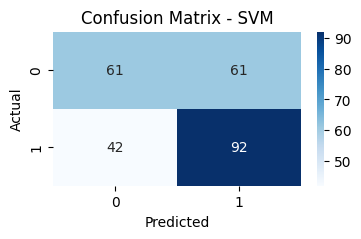

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f64358bb040>
Traceback (most recent call last):
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback functio

KNN:
Cross-validation accuracy: 0.5945 ± 0.0400
Test accuracy: 0.5859



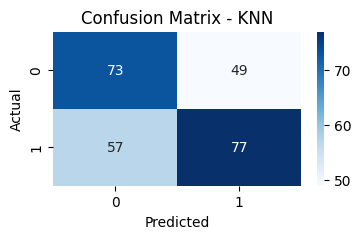

Logistic Regression:
Cross-validation accuracy: 0.5844 ± 0.0183
Test accuracy: 0.5703



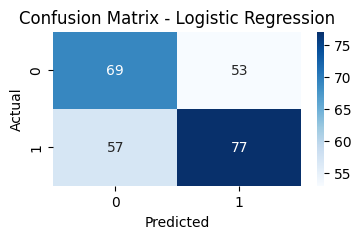

In [17]:

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import time


X_train =features
y_train = target


# Normalize the feature data
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the classifiers
svm = SVC(max_iter=10000)  # Increase the maximum number of iterations
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=10000)  # Increase the maximum number of iterations

classifiers = [('SVM', svm), ('KNN', knn), ('Logistic Regression', logreg)]

# Perform k-fold cross-validation and evaluate the models
num_folds = 7
results = []
runtimes = []

for name, clf in classifiers:
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_results = cross_val_score(clf, features,target, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    runtimes.append(np.mean(cv_results))

    print(f'{name}:')
    print(f'Cross-validation accuracy: {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}')

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test accuracy: {accuracy:.4f}\n')

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [18]:
#AROUSAL

SVM:
Cross-validation accuracy: 0.6000 ± 0.0410
Test accuracy: 0.5273



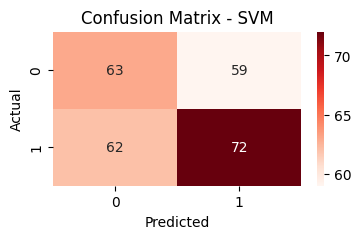

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f649c1415e0>
Traceback (most recent call last):
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback functio

KNN:
Cross-validation accuracy: 0.5656 ± 0.0311
Test accuracy: 0.5156



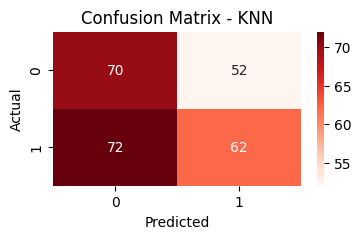

Logistic Regression:
Cross-validation accuracy: 0.6047 ± 0.0326
Test accuracy: 0.5312



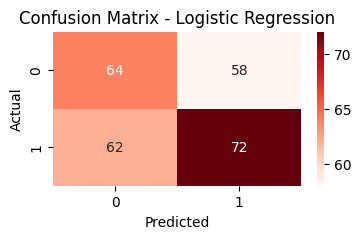

In [19]:
X_train =features
y_train = target2

# Normalize the feature data
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the classifiers
svm = SVC(max_iter=10000)  # Increase the maximum number of iterations
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=10000)  # Increase the maximum number of iterations
#rf = RandomForestClassifier()

classifiers = [('SVM', svm), ('KNN', knn), ('Logistic Regression', logreg) ]

# Perform k-fold cross-validation and evaluate the models
num_folds = 10
results = []
runtimes = []

for name, clf in classifiers:
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    runtimes.append(np.mean(cv_results))

    print(f'{name}:')
    print(f'Cross-validation accuracy: {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}')

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test accuracy: {accuracy:.4f}\n')

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


#Dominance :

In [ ]:
X_train = features
y_train = target3
# Normalize the feature data
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the classifiers
svm = SVC(max_iter=10000)  # Increase the maximum number of iterations
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=10000)  # Increase the maximum number of iterations
#rf = RandomForestClassifier()

classifiers = [('SVM', svm), ('KNN', knn), ('Logistic Regression', logreg) ]

# Perform k-fold cross-validation and evaluate the models
num_folds = 10
results = []
runtimes = []

for name, clf in classifiers:
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_results = cross_val_score(clf, features, target3, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    runtimes.append(np.mean(cv_results))

    print(f'{name}:')
    print(f'Cross-validation accuracy: {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}')

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test accuracy: {accuracy:.4f}\n')

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Likelihood :

SVM:
Cross-validation accuracy: 0.5898 ± 0.0204
Test accuracy: 0.6016



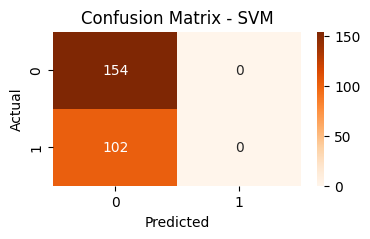

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff950c3c0d0>
Traceback (most recent call last):
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback functio

KNN:
Cross-validation accuracy: 0.5477 ± 0.0295
Test accuracy: 0.7812



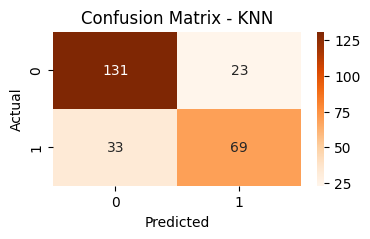

Logistic Regression:
Cross-validation accuracy: 0.5305 ± 0.0585
Test accuracy: 0.6289



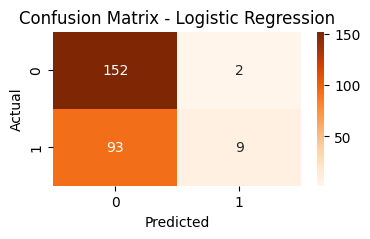

In [33]:
X_train = features
y_train = target4

# Normalize the feature data
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the classifiers
svm = SVC(max_iter=10000)  # Increase the maximum number of iterations
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=10000)  # Increase the maximum number of iterations

classifiers = [('SVM', svm), ('KNN', knn), ('Logistic Regression', logreg)]

# Perform k-fold cross-validation and evaluate the models
num_folds = 10
results = []
runtimes = []

for name, clf in classifiers:
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_results = cross_val_score(clf, features,target4, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    runtimes.append(np.mean(cv_results))

    print(f'{name}:')
    print(f'Cross-validation accuracy: {np.mean(cv_results):.4f} ± {np.std(cv_results):.4f}')

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test accuracy: {accuracy:.4f}\n')

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
